In [1]:
## load packages
library(data.table)
library(ggplot2)

In [2]:
## Download the source code file
fileUrl <- "https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip"
download.file(fileUrl, destfile = "./data/repdata_data_activity.zip")

In [80]:
# unzip it in linux, then
activity <- data.table::fread('./data/activity.csv')

In [4]:
# dim(activity) # 17568x3
summary(activity)

     steps             date               interval     
 Min.   :  0.00   Min.   :2012-10-01   Min.   :   0.0  
 1st Qu.:  0.00   1st Qu.:2012-10-16   1st Qu.: 588.8  
 Median :  0.00   Median :2012-10-31   Median :1177.5  
 Mean   : 37.38   Mean   :2012-10-31   Mean   :1177.5  
 3rd Qu.: 12.00   3rd Qu.:2012-11-15   3rd Qu.:1766.2  
 Max.   :806.00   Max.   :2012-11-30   Max.   :2355.0  
 NA's   :2304                                          

In [5]:
head(activity)

steps,date,interval
<int>,<date>,<int>
NA,2012-10-01,0
NA,2012-10-01,5
NA,2012-10-01,10
NA,2012-10-01,15
NA,2012-10-01,20
NA,2012-10-01,25


In [6]:
unique(activity$date)

[1] "2012-10-01" "2012-10-02" "2012-10-03" "2012-10-04" "2012-10-05"
 [6] "2012-10-06" "2012-10-07" "2012-10-08" "2012-10-09" "2012-10-10"
[11] "2012-10-11" "2012-10-12" "2012-10-13" "2012-10-14" "2012-10-15"
[16] "2012-10-16" "2012-10-17" "2012-10-18" "2012-10-19" "2012-10-20"
[21] "2012-10-21" "2012-10-22" "2012-10-23" "2012-10-24" "2012-10-25"
[26] "2012-10-26" "2012-10-27" "2012-10-28" "2012-10-29" "2012-10-30"
[31] "2012-10-31" "2012-11-01" "2012-11-02" "2012-11-03" "2012-11-04"
[36] "2012-11-05" "2012-11-06" "2012-11-07" "2012-11-08" "2012-11-09"
[41] "2012-11-10" "2012-11-11" "2012-11-12" "2012-11-13" "2012-11-14"
[46] "2012-11-15" "2012-11-16" "2012-11-17" "2012-11-18" "2012-11-19"
[51] "2012-11-20" "2012-11-21" "2012-11-22" "2012-11-23" "2012-11-24"
[56] "2012-11-25" "2012-11-26" "2012-11-27" "2012-11-28" "2012-11-29"
[61] "2012-11-30"

In [7]:
#?sapply

In [9]:
#sapply(X, FUN, ..., simplify = TRUE, USE.NAMES = TRUE)
#subset(activity, as.factor(subset$date))

In [10]:
#activity[, lapply(.SD, sum, na.rm = FALSE)]
total_steps <- activity[, c(lapply(.SD, sum, na.rm = FALSE))
         , .SDcols = c("steps")
         , by = .(date)         
        ]
head(total_steps)

date,steps
<date>,<int>
2012-10-01,NA
2012-10-02,126
2012-10-03,11352
2012-10-04,12116
2012-10-05,13294
2012-10-06,15420


In [11]:
#?hist

Warning message:
“Removed 8 rows containing non-finite values (stat_bin).”


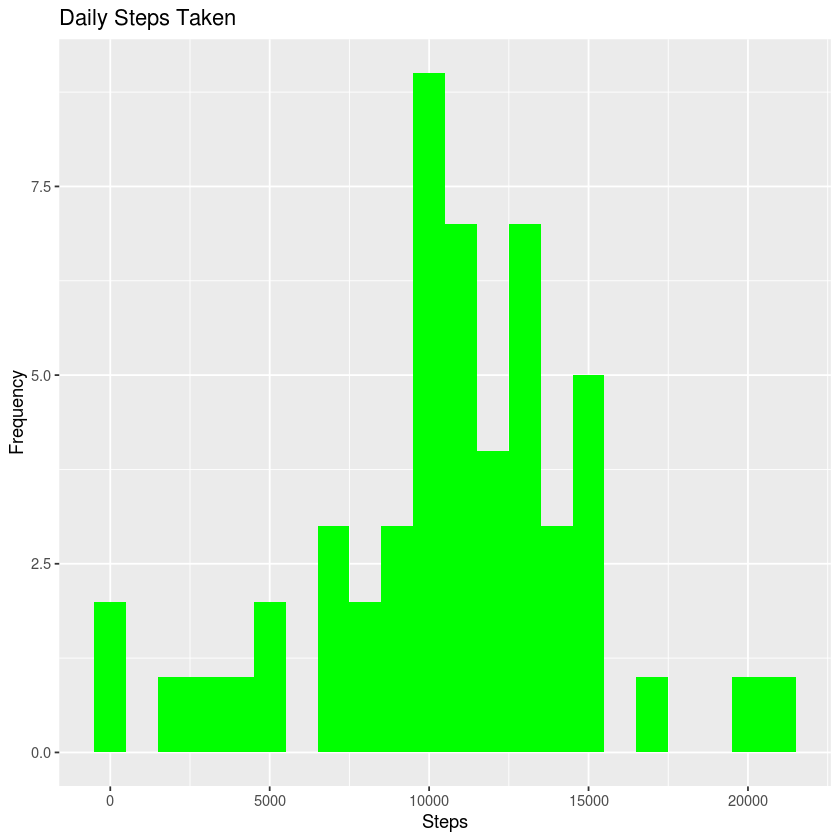

In [12]:
g <- ggplot(total_steps, aes(x = steps))
g <- g + geom_histogram(fill = 'green', binwidth = 1000)
g <- g + labs(
    title = "Daily Steps Taken"
    , x = 'Steps'
    , y = "Frequency"
)
g

In [13]:
hist(x = total_steps$steps, bin)

ERROR: Error in hist.default(x = total_steps$steps, bin): object 'bin' not found


In [14]:
total_steps[, .(Mean_steps = mean(steps, na.rm = TRUE)
               , Median_steps = median(steps, na.rm = TRUE)
               )
           ]

Mean_steps,Median_steps
<dbl>,<int>
10766.19,10765


In [15]:
interval <- activity[
    , c(
        lapply(.SD, mean, na.rm = TRUE)
       )
    , .SDcols = c("steps")
    , by = .(interval)
]
head(interval)

interval,steps
<int>,<dbl>
0,1.7169811
5,0.3396226
10,0.1320755
15,0.1509434
20,0.0754717
25,2.0943396


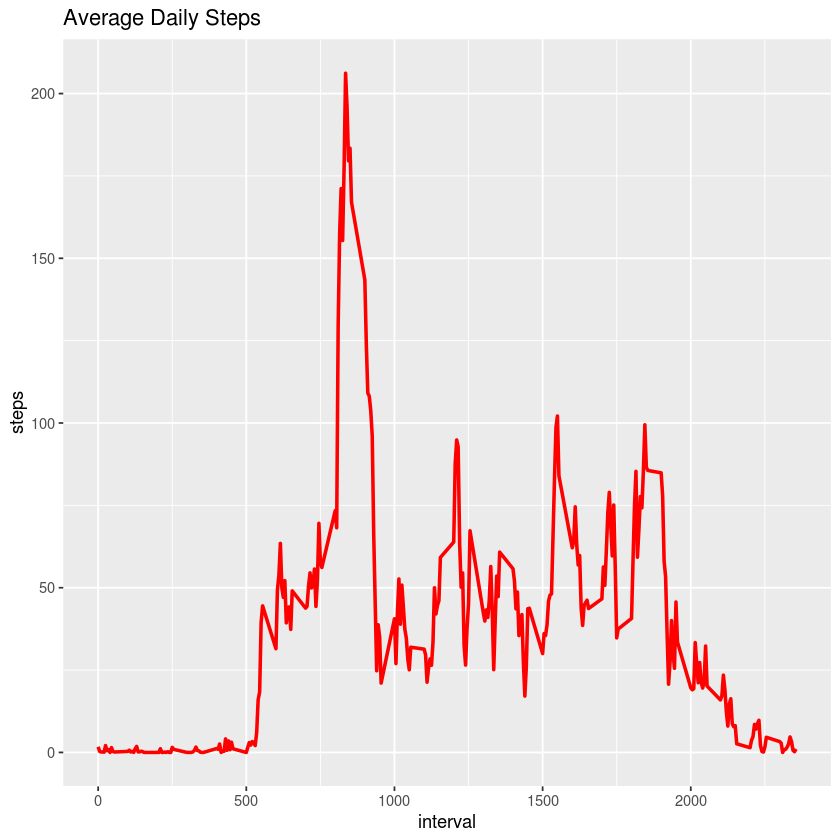

In [16]:
g <- ggplot(interval, aes(x = interval, y = steps))
g <- g + geom_line(color = 'red', size = 1)
g <- g + labs(
    title = "Average Daily Steps"
    , xlab = 'Interval'
    , ylab = "Average Steps Per Day"
)
g

In [17]:
interval[steps == max(steps), .(max_interval = interval)]

max_interval
<int>
835


In [18]:
#activity[is.na(steps), .N]
nrow(activity[is.na(steps), ])

[1] 2304

In [19]:
#activity[is.na(steps), "steps"] <- 
activity[is.na(steps), 'steps'] <- activity[, c(lapply(.SD, median, na.rm=TRUE))
                                             , .SDcols = c("steps")
                                            ]

In [20]:
head(activity)

steps,date,interval
<int>,<date>,<int>
0,2012-10-01,0
0,2012-10-01,5
0,2012-10-01,10
0,2012-10-01,15
0,2012-10-01,20
0,2012-10-01,25


In [21]:
data.table::fwrite(x = activity, file = './data/tidyData.txt', quote = FALSE)

In [22]:
# total number of steps taken per day
total_steps <- activity[, c(lapply(.SD, sum)), .SDcols = c("steps"), by = .(date)]
head(total_steps)

date,steps
<date>,<int>
2012-10-01,0
2012-10-02,126
2012-10-03,11352
2012-10-04,12116
2012-10-05,13294
2012-10-06,15420


In [23]:
# mean and median total number of steps taken per day
total_steps[, .(mean_steps = mean(steps), median_steps = median(steps))]

mean_steps,median_steps
<dbl>,<int>
9354.23,10395


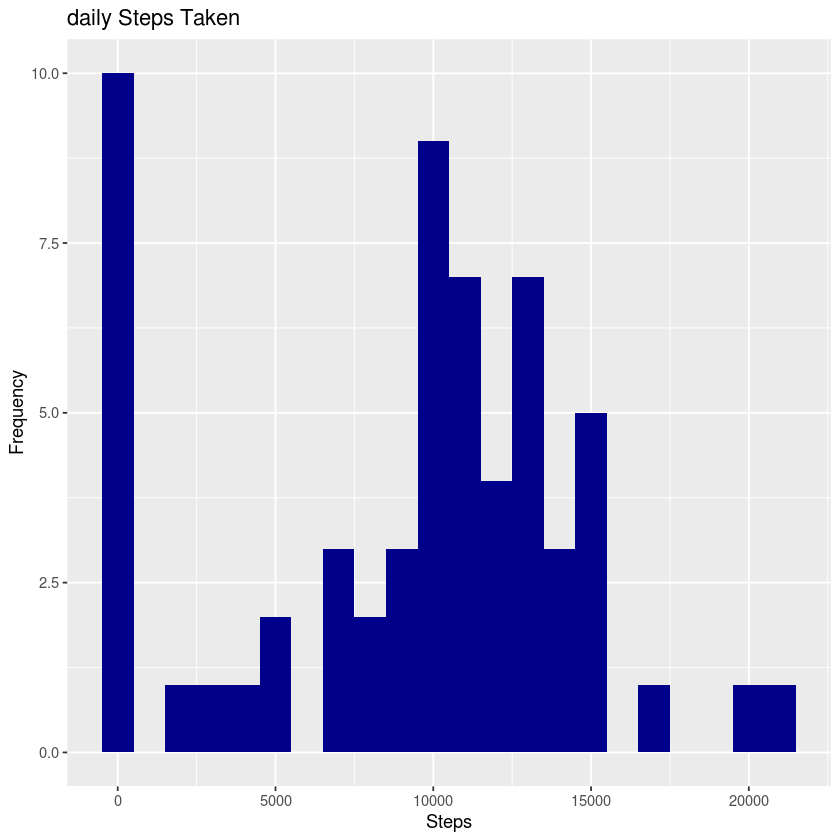

In [24]:
g <- ggplot(total_steps, aes(x = steps))
g <- g + geom_histogram(fill = "darkblue", binwidth = 1000)
g <- g + labs(
    title = "daily Steps Taken"
    , x = "Steps"
    , y = "Frequency"
)
g

In [81]:
str(activity)

Classes ‘data.table’ and 'data.frame':	17568 obs. of  3 variables:
 $ steps   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ date    : IDate, format: "2012-10-01" "2012-10-01" ...
 $ interval: int  0 5 10 15 20 25 30 35 40 45 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [190]:
# create a new factor column with 2 levels: weekday and weekend
activity <- fread(input = './data/activity.csv')
activity[, date := as.POSIXct(date, format = "%Y-%m-%d")]
activity$"Day_of_Week" = weekdays(activity$date)

In [195]:
unique(activity$Day_of_Week)

[1] "星期一" "星期二" "星期三" "星期四" "星期五" "星期六" "星期日"

In [196]:
activity [grepl(pattern = "星期一|星期二|星期三|星期四|星期五", x = activity$'Day_of_Week'), "Weekday_or_Weekend"] <- "Weekday"
activity [grepl(pattern = "星期六|星期日", x = activity$'Day_of_Week'), "Weekday_or_Weekend"] <- "Weekend"

In [197]:
unique(activity$Weekday_or_Weekend)

[1] "Weekday" "Weekend"

In [166]:
str(activity)

Classes ‘data.table’ and 'data.frame':	17568 obs. of  6 variables:
 $ steps             : int  NA NA NA NA NA NA NA NA NA NA ...
 $ date              : POSIXct, format: "2012-10-01" "2012-10-01" ...
 $ interval          : int  0 5 10 15 20 25 30 35 40 45 ...
 $ Day_of_Week       : chr  "星期一" "星期一" "星期一" "星期一" ...
 $ Weekday_or_Weekend: chr  "Weekday" "Weekday" "Weekday" "Weekday" ...
 $ Weekday or Weekend: Factor w/ 1 level "Weekday": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [199]:
# rplace missing values in "steps" column by median value
activity[is.na(steps), 'steps'] <- median(activity$steps, na.rm = TRUE)

In [210]:
# create a new dataframe, replace missing values in "steps" column by mean value, by interval and "Weekday or Weekend"
interval_df <- activity[, c(lapply(.SD, mean, na.rm = TRUE)), .SDcols = c("steps"), by = .(interval, `Weekday_or_Weekend`)]
#interval_df$"Weekday_or_Weekend" <- as.factor(interval_df$"Weekday_or_Weekend")
interval_df$Weekday_or_Weekend <- as.factor(interval_df$Weekday_or_Weekend)

In [213]:
summary(interval_df$"Weekday_or_Weekend")

Weekday Weekend 
    288     288

In [214]:
str(interval_df)

Classes ‘data.table’ and 'data.frame':	576 obs. of  3 variables:
 $ interval          : int  0 5 10 15 20 25 30 35 40 45 ...
 $ Weekday_or_Weekend: Factor w/ 2 levels "Weekday","Weekend": 1 1 1 1 1 1 1 1 1 1 ...
 $ steps             : num  2.0222 0.4 0.1556 0.1778 0.0889 ...
 - attr(*, ".internal.selfref")=<externalptr> 


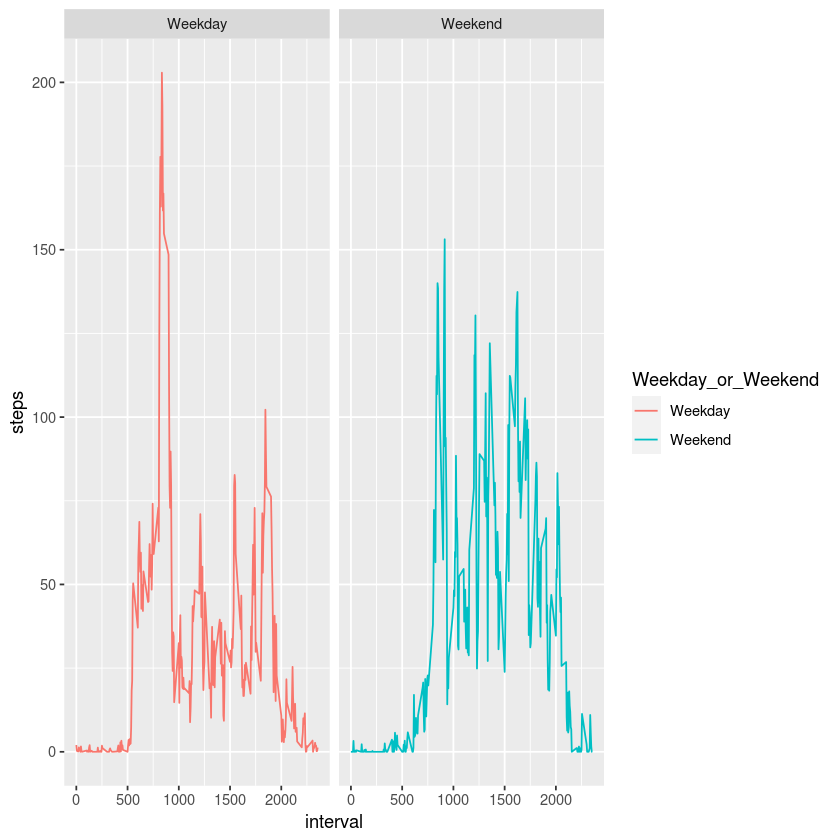

In [233]:
g <- NULL
g <- ggplot(interval_df, aes(x = interval, y = steps, color = Weekday_or_Weekend))
g <- g + geom_line()
g <- g + facet_wrap(~Weekday_or_Weekend, nrow = 1, ncol=2)
g